# Machine learning review-3

## The following is the continuation of the music genre classification that was done as review-2.The following code can classifiy between 10 genre of music with an accuracy of 70%

In [ ]:
import pandas as pd
df=pd.read_csv('features_30_sec.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
dfle = df
dfle.label = le.fit_transform(dfle.label)
dfle.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,0
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,0
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,0
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,0
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,0


In [5]:
dfle=dfle.drop('filename',axis='columns')

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df
X = data.iloc[:,0:59]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [7]:
X=X.drop('filename',axis='columns')

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

# feature importance graph

In [9]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.03725485 0.03267171 0.02233893 0.02530371 0.02274359 0.02166038
 0.02216955 0.02512649 0.01301508 0.02485552 0.02001981 0.01834395
 0.01608963 0.01465566 0.01825564 0.01619345 0.0296099  0.012209
 0.02901756 0.01345143 0.01636194 0.01071687 0.01607429 0.01514544
 0.0256608  0.01939848 0.0152048  0.01986739 0.01925849 0.01636083
 0.01673489 0.01735217 0.01780219 0.0136528  0.01990759 0.01141443
 0.01511087 0.01439632 0.0149091  0.01360142 0.01848957 0.01155921
 0.01422794 0.01468752 0.01288568 0.01035176 0.01446006 0.01046529
 0.01221113 0.01111381 0.01694678 0.01205385 0.01120127 0.01210937
 0.0105649  0.01453542 0.01189597 0.01632354]


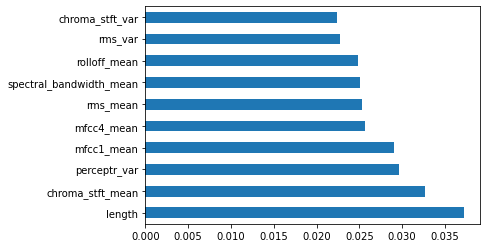

In [10]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [11]:
print(feat_importances.nlargest(10))

length                     0.037255
chroma_stft_mean           0.032672
perceptr_var               0.029610
mfcc1_mean                 0.029018
mfcc4_mean                 0.025661
rms_mean                   0.025304
spectral_bandwidth_mean    0.025126
rolloff_mean               0.024856
rms_var                    0.022744
chroma_stft_var            0.022339
dtype: float64


In [12]:
df3=X.copy()
df3.drop(df3.columns.difference(['length','chroma_stft_mean','perceptr_var','rms_mean','mfcc1_mean','rms_var','rolloff_mean','spectral_bandwidth_mean','mfcc4_mean','chroma_stft_var']), 1, inplace=True)

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [15]:
df5=X.copy()
a=df5.iloc[[911]]
a

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
911,661794,0.343227,0.088869,0.123416,0.000943,1537.59068,491565.270316,2037.446526,172948.023608,3416.751446,...,0.082122,56.111259,-4.370571,71.112091,1.173756,96.774765,0.489495,80.002655,-5.829229,75.655388


In [62]:
model.score(X,y)

0.999

In [17]:
df6=df5.copy()
df6['label']=y

In [18]:
df6.drop(df6.columns.difference(['length','chroma_stft_mean','perceptr_var','rms_mean','mfcc1_mean','rms_var','rolloff_mean','spectral_bandwidth_mean','mfcc4_mean','chroma_stft_var','label']),1,inplace=True)

In [19]:
X2=df6.drop('label',axis='columns')
y2=df6.label

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X2,y2)

ExtraTreesClassifier()

#  <h1> score without using train_test_split </h1>

In [21]:
model.score(X2,y2)

0.999

In [38]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3)

# score using train test split for ExtraTreesClassifiers

In [24]:
model2 = ExtraTreesClassifier()
model2.fit(X2_train,y2_train)

ExtraTreesClassifier()

In [39]:
model2.score(X2_test,y2_test)

0.9266666666666666

# score using Random forests

In [59]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier(n_estimators=20)
model3.fit(X2_train, y2_train)

RandomForestClassifier(n_estimators=20)

In [60]:
model3.score(X2_test, y2_test)

0.6633333333333333

# score using knn

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)

In [54]:
knn.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=25)

In [55]:
knn.score(X2_test,y2_test)

0.35333333333333333

# using cross validation for score and predicting the values

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
ans=cross_val_score(ExtraTreesClassifier(n_estimators=50),X2, y2,cv=43)
np.average(ans)

0.7042045837546342

In [30]:
ans=X2.iloc[[885]]
df6.iloc[[885]]

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_bandwidth_mean,rolloff_mean,perceptr_var,mfcc1_mean,mfcc4_mean,label
885,661504,0.395937,0.092713,0.119592,0.003573,1649.26749,3439.30885,0.005197,-175.087677,59.922405,8


In [33]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(ExtraTreesClassifier(n_estimators=50),X2,y2,cv=43)
print(y_pred)

[2 8 2 0 2 0 0 0 2 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 9 2 0 0 0 0 0 0 9 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0
 0 4 4 0 0 6 0 0 0 0 0 0 0 2 0 0 8 2 0 0 0 9 1 0 9 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 9 1
 1 7 1 8 2 1 2 1 2 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 5 5 5 1 1 5 1 5 1 2 2 5 3 2 9 9 2 2 9 5 5 2 2 2 9 2 2 2 0 9 2
 2 5 5 2 2 2 2 2 5 2 5 0 2 2 5 2 2 9 3 2 2 2 2 7 2 9 5 2 2 2 5 9 5 2 2 2 2
 2 2 2 9 8 2 0 2 1 2 5 2 2 2 2 2 2 2 2 0 2 9 2 9 2 2 2 9 2 2 2 2 2 9 5 2 9
 2 2 2 4 3 3 3 4 3 3 3 3 3 9 4 3 3 3 2 9 3 3 3 3 9 3 3 3 3 3 9 4 3 3 3 3 3
 9 3 3 3 3 3 2 3 2 3 3 3 3 8 1 3 3 3 3 3 3 6 6 8 7 3 3 3 7 3 4 8 3 3 3 3 3
 3 3 3 3 3 3 3 3 8 8 3 8 3 8 3 3 3 3 3 3 3 4 8 3 3 3 3 3 3 3 3 4 8 4 4 4 4
 4 4 4 4 4 0 2 6 3 4 4 4 4 4 0 4 2 4 4 4 3 2 3 3 7 3 3 3 4 4 4 4 4 4 4 4 4
 5 4 4 4 4 4 4 4 4 3 3 8 4 4 4 4 8 9 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 7 4 7 7
 4 4 4 8 4 8 4 4 4 4 4 4 

In [65]:
y_pred[892]

8

# confusion matrix

<AxesSubplot:>

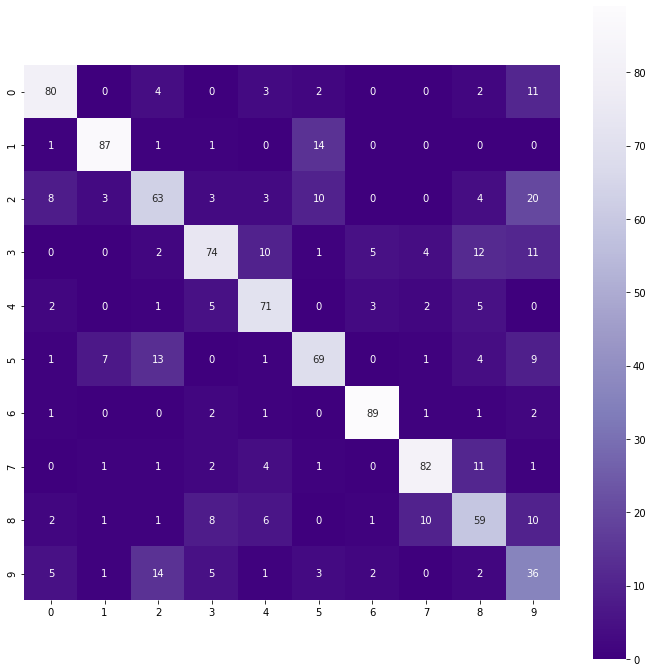

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat=confusion_matrix(y_pred,y)
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat,square=True, annot=True, cmap='Purples_r', fmt='d', cbar=True,ax=ax)

# function for printing the genre of the song


### example-1 for song no 775 it correct predicts the category as 7

In [115]:
df8=df6.copy()

def predict_genre(index):
    y_pred=cross_val_predict(ExtraTreesClassifier(n_estimators=50),X2,y2,cv=43)
    return y_pred[index]

In [116]:
n=int(input())
predict_genre(n)

775


7

#### example-2 for song no 3 it corretly predicts the category as 0

In [117]:
n=int(input())
predict_genre(n)

3


0